In [15]:
from dataclasses import dataclass
from typing import Any, List

from collections import namedtuple
from snake_egg import EGraph, Rewrite, Var, vars



In [18]:
# Define the operations as named tuples
add = namedtuple("add", "x y")
sub = namedtuple("sub", "x y")
mul = namedtuple("mul", "x y")
div = namedtuple("div", "x y")
shll = namedtuple("shll", "x y")  # Bitshift left
shrl = namedtuple("shrl", "x y")  # Bitshift right
not_ = namedtuple("not_", "x")    # Bitwise NOT
neg = namedtuple("neg", "x")      # Negation

# Evaluation function
def eval_ops(car, cdr):
    try:
        if isinstance(car, (int, float)):
            return car

        if len(cdr) == 0:
            return None

        op = car
        args = cdr

        a = args[0]
        if op == not_:
            return ~a
        if op == neg:
            return -a

        b = args[1]
        if op == add:
            return a + b
        if op == sub:
            return a - b
        if op == mul:
            return a * b
        if op == div and b != 0:
            return a / b
        if op == shll:
            return a << b
        if op == shrl:
            return a >> b

    except:
        pass

    return None

# Rewrite rules
a, b, c = vars("a b c")  # Variables for rewrite rules

list_rules: List[List[Any]] = [
    # Basic arithmetic rules
    ["comm_add", add(a, b), add(b, a)],
    ["comm_mul", mul(a, b), mul(b, a)],
    ["zero_add", add(a, 0), a],
    ["zero_mul", mul(a, 0), 0],
    ["one_mul", mul(a, 1), a],
    ["sub_zero", sub(a, 0), a],
    ["neg", neg(a), sub(0, a)],

    # Bitwise rules
    ["shll_zero", shll(a, 0), a],
    ["shrl_zero", shrl(a, 0), a],
    ["not_not", not_(not_(a)), a],
    
    # Dac paper methods
    ["mul_associativity", mul(mul(a, b), c), mul(b, mul(a, c))],
    ["add_associativity", add(add(a, b), c), add(b, add(a, c))],
    ["mul_distributivity", mul(a, add(b, c)), add(mul(a, b), mul(a, c))],
    ["sum_same", add(a, a), mul(a, 2)],
    ["mul_sum_same", add(mul(a, b), b), mul(add(a, 1), b)],
    ["sub_to_neg", sub(a, b), add(a, neg(b))],
    ["mul_by_two", mul(a, 2), shll(a, 1)],
    ["merge_left_shift", shll(shll(a, b), c), shll(a, add(b, c))],
    ["merge_right_shift", shrl(shrl(a, b), c), shrl(a, add(b, c))],
    ["neg_to_not", neg(a), add(not_(a), 1)]
]

# Convert list rules into rewrites
rules = [Rewrite(frm, to, name) for name, frm, to in list_rules]

# Function to check if two expressions are equivalent
def is_equal(expr_a, expr_b, iters=5):
    egraph = EGraph(eval_ops)
    id_a = egraph.add(expr_a)
    id_b = egraph.add(expr_b)
    egraph.run(rules, iters)
    return egraph.equiv(id_a, id_b)

a = "a"
b = "b"
c = "c"

# Test functions
def test_addition_commutative():
    expr_a = add(a, b)
    expr_b = add(b, a)
    assert is_equal(expr_a, expr_b)

def test_bitshift_left_zero():
    expr_a = shll(a, 0)
    expr_b = a
    assert is_equal(expr_a, expr_b)

def test_bitwise_not():
    expr_a = not_(not_(a))
    expr_b = a
    assert is_equal(expr_a, expr_b)

def test_negation():
    expr_a = neg(a)
    expr_b = sub(0, a)
    assert is_equal(expr_a, expr_b)
    
def test_sum_same():
    expr_a = add(a, a)
    expr_b = mul(a, 2)
    assert is_equal(expr_a, expr_b)

def test_mul_sum_same():
    expr_a = add(mul(a, b), b)
    expr_b = mul(add(a, 1), b)
    assert is_equal(expr_a, expr_b)

def test_sub_to_neg():
    expr_a = sub(a, b)
    expr_b = add(a, neg(b))
    assert is_equal(expr_a, expr_b)

def test_mul_by_two():
    expr_a = mul(a, 2)
    expr_b = shll(a, 1)
    assert is_equal(expr_a, expr_b)

def test_merge_left_shift():
    expr_a = shll(shll(a, b), c)
    expr_b = shll(a, add(b, c))
    assert is_equal(expr_a, expr_b)

def test_merge_right_shift():
    expr_a = shrl(shrl(a, b), c)
    expr_b = shrl(a, add(b, c))
    assert is_equal(expr_a, expr_b)

def test_neg_to_not():
    expr_a = neg(a)
    expr_b = add(not_(a), 1)
    assert is_equal(expr_a, expr_b)

def test_mul_associativity():
    expr_a = mul(mul(a, b), c)
    expr_b = mul(b, mul(a, c))
    assert is_equal(expr_a, expr_b)

def test_add_associativity():
    expr_a = add(add(a, b), c)
    expr_b = add(a, add(b, c))
    assert is_equal(expr_a, expr_b)

def test_mul_distributivity():
    expr_a = mul(a, add(b, c))
    expr_b = add(mul(a, b), mul(a, c))
    assert is_equal(expr_a, expr_b)
# Run the new tests

test_addition_commutative()
test_bitshift_left_zero()
test_bitwise_not()
test_negation()
test_sum_same()
test_mul_sum_same()
test_sub_to_neg()
test_mul_by_two()
test_merge_left_shift()
test_merge_right_shift()
test_neg_to_not()
test_mul_associativity()
test_add_associativity()
test_mul_distributivity()
print("All tests passed!")


All tests passed!


In [216]:
# Define the operations as named tuples
add = namedtuple("add", "x y")
sub = namedtuple("sub", "x y")
mul = namedtuple("mul", "x y")
div = namedtuple("div", "x y")
shll = namedtuple("shll", "x y")  # Bitshift left
shrl = namedtuple("shrl", "x y")  # Bitshift right
not_ = namedtuple("not_", "x")    # Bitwise NOT
neg = namedtuple("neg", "x")      # Negation

# Evaluation function
def eval_ops(car, cdr):
    try:
        if isinstance(car, (int, float)):
            return car

        if len(cdr) == 0:
            return None

        op = car
        args = cdr

        a = args[0]
        if op == not_:
            return ~a
        if op == neg:
            return -a

        b = args[1]
        if op == add:
            return a + b
        if op == sub:
            return a - b
        if op == mul:
            return a * b
        if op == div and b != 0:
            return a / b
        if op == shll:
            return a << b
        if op == shrl:
            return a >> b

    except:
        pass

    return None

# Rewrite rules
a, b, c = vars("a b c")  # Variables for rewrite rules

list_rules: List[List[Any]] = [
    # Basic arithmetic rules
    ["comm_add", add(a, b), add(b, a)],
    ["comm_mul", mul(a, b), mul(b, a)],
    ["zero_add", add(a, 0), a],
    ["zero_mul", mul(a, 0), 0],
    ["one_mul", mul(a, 1), a],
    ["sub_zero", sub(a, 0), a],
    ["neg", neg(a), sub(0, a)],

    # Bitwise rules
    ["shll_zero", shll(a, 0), a],
    ["shrl_zero", shrl(a, 0), a],
    ["not_not", not_(not_(a)), a],
    
    # DAC paper rules
    ["mul_associativity", mul(mul(a, b), c), mul(b, mul(a, c))],
    ["add_associativity", add(add(a, b), c), add(b, add(a, c))],
    ["mul_distributivity", mul(a, add(b, c)), add(mul(a, b), mul(a, c))],
    ["sum_same", add(a, a), mul(a, 2)],
    ["mul_sum_same", add(mul(a, b), b), mul(add(a, 1), b)],
    ["sub_to_neg", sub(a, b), add(a, neg(b))],
    ["mul_by_two", mul(a, 2), shll(a, 1)],
    ["merge_left_shift", shll(shll(a, b), c), shll(a, add(b, c))],
    ["merge_right_shift", shrl(shrl(a, b), c), shrl(a, add(b, c))],
    ["neg_to_not", neg(a), add(not_(a), 1)]
]

# Convert list rules into rewrites
rules = [Rewrite(frm, to, name) for name, frm, to in list_rules]

# Function to check if two expressions are equivalent
def is_equal(expr_a, expr_b, iters=5):
    egraph = EGraph(eval_bitwise_ops)
    id_a = egraph.add(expr_a)
    id_b = egraph.add(expr_b)
    egraph.run(rules, iters)
    return egraph.equiv(id_a, id_b)

def get_egraph_in_range(expr, min_iters=0, max_iters=20):
    expr_list = []
    last_iter_expr = None
    # Create an EGraph with the evaluation function
    egraph = EGraph(eval_ops)

    # Add the expression to the e-graph
    expr_id = egraph.add(expr)

    # Run the e-graph with the rewrite rules
    for cur_iters in range(min_iters, max_iters):
        egraph.run(rules, cur_iters)
        cur_expr = egraph.extract(expr_id)
        if last_iter_expr == cur_expr:
            break
        else:
            expr_list.append(cur_expr)
            last_iter_expr = cur_expr

    return expr_list


# a = "a"
# b = "b"
# c = "c"

expr = not_('councat.10')

# Example usage
 # Replace with your expression
equivalents = get_egraph_in_range(expr)
for eq in equivalents:
    print(eq)





not_(x='councat.10')


Function: e_graph_test
Batches of nodes: [[11, 100, 10], [36, 35], [9, 8, 7]]
add(x=add(x='add.9', y='a'), y=4)
add(x=add(x='add.9', y='a'), y='c')
add(x='z', y=mul(x=add(x='x', y='y'), y=2))


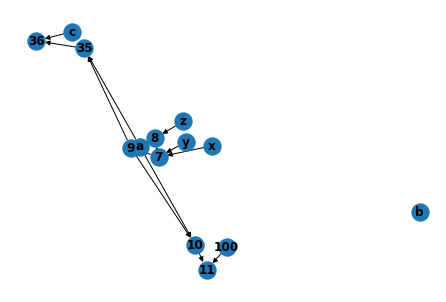

In [207]:
##The following code block reads IR and turns it to a dictionary readable for nx digraph
file_path = '/home/miao/xls/work_space/EGraphTest/test.opt.ir'
out_json_path = '/home/miao/xls/work_space/EGraphTest/e_graph_ins.json'
file_path_out = '/home/miao/xls/work_space/EGraphTest/test.rewrite.ir'

TopFunctionName = None
with open(file_path, 'r') as f:
    ir_content = f.read()
    ir_dict = slice_ir_by_function(ir_content)

#     print(ir_content)

FuncNodeDict = {}
for fn_name, fn_content in ir_dict.items():
    NodeDict = {}
    Lines = ParseIRFile(fn_content)
    for Line in Lines:    
        NodeList = LineToDict(Line)
        if NodeList != None:
            for NodeObj in NodeList:
                NodeDict[NodeObj.name] = NodeObj
        if "top" in Line:
            TopFunctionName = fn_name
    FuncNodeDict[fn_name] = NodeDict
SubCounter = 0
NodeCounter = 0
JsonOutDict = {}
# print(FuncNodeDict)


## The following code reads digraph and partitions them into legal rewrite batches
graph_by_function = {}
sorted_nodes_by_function = {}

for fn_name, fn_nodes in FuncNodeDict.items():
    G = nx.DiGraph()
    G = DictToGraph(G, fn_nodes)
    graph_by_function[fn_name] = G
    nx.draw(G, with_labels=True, font_weight='bold')
    # Check if the graph is a DAG
    if nx.is_directed_acyclic_graph(G):
        sorted_nodes = list(nx.topological_sort(G))
        sorted_nodes_by_function[fn_name] = sorted_nodes[::-1]
    else:
        sorted_nodes_by_function[fn_name] = None
        print(f"[Warning] Graph for function {fn_name} is not a DAG. Topological sorting cannot be performed.")

        

rewrite_batch_by_function = {}
processed_nodes = set()

for fn_name, nodes in sorted_nodes_by_function.items():
    G = graph_by_function[fn_name]
    rewrite_batch_by_function[fn_name] = []
    
    temp_nodes = nodes.copy()
    while temp_nodes:
        start_node = temp_nodes[0]
        cur_batch = traverse_graph(G, start_node, processed_nodes)
        if cur_batch != []:
            rewrite_batch_by_function[fn_name].append(cur_batch)
            for node in cur_batch:
                processed_nodes.add(node)
                if node in temp_nodes:
                    temp_nodes.remove(node)
        else:
            break

    print(f"Function: {fn_name}")
    print("Batches of nodes:", rewrite_batch_by_function[fn_name])
    
## The following code takes each batch, and generate expression for e-graph search
rewrite_candidate_by_function = {}
for fn_name, batch_list in rewrite_batch_by_function.items():
    G = graph_by_function[fn_name]
    rewrite_candidate_by_function[fn_name] = {}
    rewrite_candidate_by_function[fn_name]['is_unsigned'] = []
    rewrite_candidate_by_function[fn_name]['rewrite_candidates'] = []
    for batch in batch_list:
        batch_expr, is_unsigned = get_expr_from_batch(G, batch)
#         print("Input Expr: ", batch_expr)
        cur_candidates = get_egraph_in_range(eval(batch_expr))
        rewrite_candidate_by_function[fn_name]['is_unsigned'].append(is_unsigned)
        rewrite_candidate_by_function[fn_name]['rewrite_candidates'] .append(cur_candidates)
        
# print(rewrite_candidate_by_function)
    
operation_mapping_unsigned = {"add" : "kAdd",
                              "mul" : "kUMul",
                              "div" : "kUDiv",
                              "sub" : "kSub",
                            "literal" : "Literal",
                             "neg" : "kNeg",
                             "shll" : "kShll",
                             "shrl" : "kShrl",
                             "not" : "kNot"}

operation_mapping_signed = {"add" : "kAdd",
                              "mul" : "kSMul",
                              "div" : "kSDiv",
                              "sub" : "kSub",
                            "literal" : "Literal",
                             "neg" : "kNeg",
                             "shll" : "kShll",
                             "shrl" : "kShrl",
                             "not" : "kNot"}
rewrite_rule = "NoRule"
json_dict = {}
counter = 0
for fn_name, all_rewrite_candidates_dict in rewrite_candidate_by_function.items():
    G = graph_by_function[fn_name]
    for i in range(len(all_rewrite_candidates_dict['rewrite_candidates'])):
        cur_rewrite_candidate = all_rewrite_candidates_dict['rewrite_candidates'][i]
        # This is where we call our selector to get a best rewrite
        if rewrite_rule == "NoRule":
            rewrite_expr = cur_rewrite_candidate[-1]
        else:
            pass
        
        #After getting the wanted rewrite_expr, we apply it and generate json dict
        #First we initialize the dictionary
        json_dict[str(counter)] = {}
        json_dict[str(counter)]["FuncName"] = fn_name
        
        #Then, find bitwidth and if the variables are signed, and assign operator mapping
        cur_is_unsigned = all_rewrite_candidates_dict['is_unsigned'][i]
        bit_width = G.nodes[rewrite_batch_by_function[fn_name][i][0]]['BitWidth']
        if cur_is_unsigned:
            cur_operation_mapping = operation_mapping_unsigned
        else:
            cur_operation_mapping = operation_mapping_signed
        #Next, handle node generation
        nodes_involved_dict, batch_out_counter = gen_json_from_expr_recursive(G, str(rewrite_expr), cur_operation_mapping, bit_width)
        
        #Next, handle node elimination
        for old_node_id in rewrite_batch_by_function[fn_name][i]:
            nodes_involved_dict[G.nodes[old_node_id]['OperationName']] = G.nodes[old_node_id]
            nodes_involved_dict[G.nodes[old_node_id]['OperationName']]['ReplaceSelfWith'] = 'Kill'
        
        #Next, handle batch output replacement
        #ToDo: we need to verify the first is always the output of the batch
        nodes_involved_dict[G.nodes[rewrite_batch_by_function[fn_name][i][0]]['OperationName']] = G.nodes[rewrite_batch_by_function[fn_name][i][0]]
        nodes_involved_dict[G.nodes[rewrite_batch_by_function[fn_name][i][0]]['OperationName']]['ReplaceSelfWith'] = 'auto_gen'+str(batch_out_counter)
        
        json_dict[str(counter)]["NodesInvolved"] = list(nodes_involved_dict.values())
        counter += 1
        print(rewrite_expr)
#         print(nodes_involved_dict)

with open(out_json_path, 'w') as json_file:
        json.dump(json_dict, json_file, indent=4)  

In [209]:
print("\nRunning Standalone Rewriter")
command = f"{'/home/miao/xls/bazel-bin/xls/tools/RL_main'} {file_path} {out_json_path} {file_path_out}"
# print(command)
try: 
    with open("/home/miao/xls/work_space/EGraphTest/rewrite_log.txt", 'w') as output_file:
        result = subprocess.run(command, shell=True, stdout=output_file, stderr=subprocess.PIPE, text=True)
        result.check_returncode()        
    print("Rewriter Run Done")
except subprocess.CalledProcessError as e:
    print("An error occurred while running the command.")
    print("Error message:", e.stderr)   


Running Standalone Rewriter
Rewriter Run Done


In [182]:
def remove_entries(operand_list, to_remove):
    return [op for op in operand_list if op not in to_remove]

def traverse_graph(G, start_node, processed_nodes):
# This function takes in a graph and partitions it to the largest legal rewrite batch
# If a node is not in the allowed list, it is discarded.
    allowed_operations = ["add", "mul", "literal", "shll", "shrl", "not", "neg", "sub", "div"]
    # Initialize the batch list
    batch = []

    # Create a set to keep track of visited nodes
    visited = set()

    # Traverse the graph
    stack = [start_node]
    while stack:
        current = stack.pop()
        current_op_type = G.nodes[current]['OperationType']

        # Check if the current node's operation is allowed
        if current_op_type in allowed_operations:
            # Add the current node to the batch and mark as visited
            batch.append(current)
            visited.add(current)

            for parent in G.predecessors(current):
                # Check if all children of the parent are either visited or disallowed
                all_children_allowed = all(
                    child in visited or G.nodes[child].get('OperationType', None) not in allowed_operations
                    for child in G.successors(parent)
                )

                if all_children_allowed and parent not in processed_nodes and parent not in visited:
                    stack.append(parent)

    return batch

# Example usage with your graph
# start_node = 11
# path = traverse_graph(G, start_node, [])
# print("Traversed path:", path)
# print(remove_entries(nodes, path))

def get_expr_from_batch(G, batch):
    N = len(batch)
    max_loop_count = N * (N + 1) // 2
    batch_queue = deque(batch)
    visited_dict = {}
    loop_count = 0
    cur_expr = None
    is_unsigned = True
    while batch_queue:
        cur_expr = None
        cur_node = batch_queue.pop()
        # If all operands are not in the batch waiting the be handled, or they have been vistied before
        if all(operand not in batch or operand in visited_dict for operand in G.nodes[cur_node]['Operands']):
            if G.nodes[cur_node]['OperationType'] == 'literal':
                visited_dict[G.nodes[cur_node]['OperationName']] = str(G.nodes[cur_node]['Value'])
            else:
                cur_expr = G.nodes[cur_node]['OperationType'] + "("
                for operand in G.nodes[cur_node]['Operands']:
                    # If the operand belongs to a processed expr, use it. Otherwise use the operand as string
                    if operand in visited_dict.keys():
                        cur_expr = cur_expr + visited_dict[operand] + ","
                    else:
                        cur_expr = cur_expr + "'" + operand + "'" + ","
                cur_expr = cur_expr[:-1] + ")"
                visited_dict[G.nodes[cur_node]['OperationName']] = cur_expr
            
            if G.nodes[cur_node]['OperationType'] in ["neg", "smul", "sdiv"]:
                is_unsigned = False
            
        else:
            batch_queue.appendleft(cur_node)
            
        if loop_count > max_loop_count:
            break
        else:
            loop_count += 1
            
    if len(batch_queue) == 0: 
        # Return the one with the most dependency
        return cur_expr, is_unsigned
    else:
        print("[ERROR] Unresolved dependency in batch to expr generation")
        return None, None
    
    return None, None

def gen_json_from_expr_recursive(G, expr, operation_mapping, bit_width, nodes_involved_dict=None, counter=None):
    if counter is None:
        counter = 0
    if nodes_involved_dict is None:
        nodes_involved_dict = {}
    
    match = re.search(r'\b(\w+)\(([^()]+)\)', expr)
    if not match:
        return nodes_involved_dict, counter-1

    operation_type, operands = match.groups()
    operation_name = 'auto_gen'+str(counter)

    # Replace the innermost expression with the placeholder
    new_expr = expr.replace(match.group(0), operation_name)
#     print("OpType: ", operation_type, "; Operands: ",operands)
#     print("Iter:", counter, "expr: ",new_expr)
    
    
    # Handle each node:
    nodes_involved_dict, counter = handle_node_generation(G, operation_type, operands, operation_name, bit_width, nodes_involved_dict, operation_mapping, counter)
    
    return gen_json_from_expr_recursive(G, new_expr, operation_mapping, bit_width, nodes_involved_dict, counter+1)


# Node(name=None, bitwidth=None, operation=None, operands=None, 
#                  idNum=None, value=None, pos=None, FuncIO=None, start=None, width=None)

def handle_node_generation(G, operation_type, operands, operation_name, bit_width, nodes_involved_dict, operation_mapping, counter):
    operands_list = operands.split(',')
    new_node_operands = []
    NewNode = None
    for cur_operand in operands_list:
        cur_operand = cur_operand.split("=")[-1]
        # First setup operand list
        if cur_operand.strip("'").strip(" ").isdigit():
            counter += 1
            # Handle pure digit, generate literal from them
            try:
                cur_value = int(cur_operand.strip("'").strip(" "))
            except ValueError:
                cur_value = float(cur_operand.strip("'").strip(" "))
            NewLiteralNode = node_to_dict(Node('auto_gen'+str(counter), bit_width, 'Literal', value=cur_value))
            NewLiteralNode["ReplaceSelfWith"] = 'Gen'       
            nodes_involved_dict['auto_gen'+str(counter)] = NewLiteralNode
            new_node_operands.append('auto_gen'+str(counter))
        else:
            new_node_operands.append(cur_operand.strip("'"))
    #Now generate new node:
    NewNode = node_to_dict(Node(operation_name, bit_width, operation_mapping[operation_type], new_node_operands))
    NewNode["ReplaceSelfWith"] = 'Gen'
    nodes_involved_dict[operation_name] = NewNode
    return nodes_involved_dict, counter

start_node = 11
path = traverse_graph(G, start_node, [])
print("Traversed batch:", path)
print("Nodes Left: ", remove_entries(nodes, path))

exprs = get_expr_from_batch(G, path)
print("exprs: ", exprs)


operation_mapping_unsigned = {"add" : "kAdd",
                              "mul" : "kUMul",
                              "div" : "kUDiv",
                              "sub" : "kSub",
                            "literal" : "Literal",
                             "neg" : "kNeg",
                             "shll" : "kShll",
                             "shrl" : "kShrl",
                             "not" : "kNot"}

operation_mapping_signed = {"add" : "kAdd",
                              "mul" : "kSMul",
                              "div" : "kSDiv",
                              "sub" : "kSub",
                            "literal" : "Literal",
                             "neg" : "kNeg",
                             "shll" : "kShll",
                             "shrl" : "kShrl",
                             "not" : "kNot"}

expr = "add(add(neg('a'), add('x','y')), 4)"
parsed_expr, counter = gen_json_from_expr_recursive(G, expr, operation_mapping_unsigned, 32)
print("orginal expr:", expr)
print(parsed_expr)

Traversed batch: [11, 100, 10]
Nodes Left:  [36, 35, 9, 8, 7, 'c', 'b', 'a', 'z', 'y', 'x']
exprs:  ("add(add('add.9','a'),4)", True)
orginal expr: add(add(neg('a'), add('x','y')), 4)
{'auto_gen0': {'OperationName': 'auto_gen0', 'BitWidth': 32, 'OperationType': 'kNeg', 'Operands': ['a'], 'idNum': None, 'Value': -1, 'Pos': None, 'FuncIO': None, 'Start': None, 'Width': None, 'ArraySize': None, 'Indices': None, 'ReplaceSelfWith': 'Gen'}, 'auto_gen1': {'OperationName': 'auto_gen1', 'BitWidth': 32, 'OperationType': 'kAdd', 'Operands': ['x', 'y'], 'idNum': None, 'Value': -1, 'Pos': None, 'FuncIO': None, 'Start': None, 'Width': None, 'ArraySize': None, 'Indices': None, 'ReplaceSelfWith': 'Gen'}, 'auto_gen2': {'OperationName': 'auto_gen2', 'BitWidth': 32, 'OperationType': 'kAdd', 'Operands': ['auto_gen0', ' auto_gen1'], 'idNum': None, 'Value': -1, 'Pos': None, 'FuncIO': None, 'Start': None, 'Width': None, 'ArraySize': None, 'Indices': None, 'ReplaceSelfWith': 'Gen'}, 'auto_gen4': {'OperationNa

In [101]:
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism
import json
import subprocess
import time
from collections import deque
from itertools import count

In [23]:
class Node:
    def __init__(self, name=None, bitwidth=None, operation=None, operands=None, 
                 idNum=None, value=-1, pos=None, FuncIO=None, start=None, width=None, array_sizes=None, indices=None):
        self.name = name
        self.bitwidth = bitwidth
        self.operation = operation
        self.operands = operands
        self.idNum = idNum
        self.value = value
        self.pos = pos
        self.FuncIO = FuncIO
        self.start = start
        self.width = width
        self.array_sizes = array_sizes
        self.indices = indices

    def __repr__(self):
        return f"Node(name={self.name}, bitwidth={self.bitwidth}, operation={self.operation}, operands={self.operands}, id={self.idNum}, value={self.value}, pos={self.pos}, FuncIO={self.FuncIO}, start={self.start}, width={self.width}, array_sizes={self.array_sizes}, indices={self.indices})"

def node_to_dict(node):
    return {
        "OperationName": node.name,
        "BitWidth": node.bitwidth,
        "OperationType": node.operation,
        "Operands": node.operands,
        "idNum": node.idNum,
        "Value": node.value,
        "Pos": node.pos,
        "FuncIO": node.FuncIO,
        "Start": node.start,
        "Width": node.width,
        "ArraySize": node.array_sizes,
        "Indices": node.indices
    }
    
def ParseIRFile(ir_text):
    nodes_dict = {}
    lines = ir_text.strip().split("\n")[:]
    return lines

def LineToDict(line):
    nodes = []
    # Check for function header
    FuncIO = "Not"
    if "fn" in line:
        FuncIO = "In"
        signature_pattern = re.compile(r"fn\s+(\w+)\((.*?)\)\s*->\s*(.*?)\s*\{")
        signature_match = signature_pattern.search(line)
        if signature_match:
            func_name = signature_match.group(1)
            params = signature_match.group(2).split(',')
            for param in params:
                param_name, param_type = param.split(':')
                param_name = param_name.strip()
                array_sizes = [int(size) for size in re.findall(r'\[(\d+)\]', param_type)]
                if array_sizes == []:
                    array_sizes = None
                bitwidth = int(array_sizes.pop(0))  # The first size is the bitwidth
                node = Node(name=param_name, bitwidth=bitwidth, array_sizes=array_sizes, FuncIO="In")
                nodes.append(node)
        return nodes

    if "ret" in line:
        FuncIO = "Out"
        line = line[4:]
        
    if line == "}":
        return None

    # Extract node name
    name = re.search(r"(\w+\.\d+):", line).group(1)

    # Extract bitwidth and array size
    array_pattern = re.compile(r"bits\[(\d+)\]((?:\[\d+\])*)")
    array_match = array_pattern.search(line)
    if array_match:
        bitwidth = int(array_match.group(1))
        array_sizes_str = array_match.group(2)
        array_sizes = [int(size) for size in re.findall(r'\[(\d+)\]', array_sizes_str)]
        if array_sizes == []:
            array_sizes = None
    
    # Extract operation
    operation = re.search(r"= (\w+)", line).group(1)

    # Extract operands; 
    # Eidt to ignore other argument keywords
    operands = re.findall(r"(\w+\.\d+|\w+)", line.split("=")[1])
    operands = [op for op in operands if op not in [operation, "value", "id", "pos", "start", "width", "indices"]]

    # Extract indices: only applies for array_indice node
    indices = None
    indices_match = re.search(r"indices=\[(.*?)\]", line)
    if indices_match:
        # Get the string of indices
        indices_str = indices_match.group(1)
        # Find all occurrences of literals or node names in the indices string
        indices = re.findall(r"(\w+\.\d+|\w+)", indices_str)
    
    # Extract id
    idNum = int(re.search(r"id=(\d+)", line).group(1))

    # Extract value (if present)
    value_match = re.search(r"value=(\d+)", line)
    value = int(value_match.group(1)) if value_match else -1

    # Extract pos (if present)
    pos_match = re.search(r"pos=\[\((\d+,\d+,\d+)\)\]", line)
    pos = tuple(map(int, pos_match.group(1).split(","))) if pos_match else None

    # Extract start and width for bit_slice (if present)
    start = None
    width = None
    if operation == "bit_slice":
        start = int(re.search(r"start=(\d+)", line).group(1))
        width = int(re.search(r"width=(\d+)", line).group(1))

    # Create Node object
    node = Node(name, bitwidth, operation, operands, idNum, value, pos, FuncIO, start, width, array_sizes, indices)
    
    # Add to node list
    nodes.append(node)
    return nodes

def DictToGraph(G, NodeDict):
    # This function turns the node dictionary to directional graph
    NodeList = []
    EdgeList = []
    for NodeName in NodeDict:
        if NodeDict[NodeName].FuncIO != "In": 
            # This if is for handling the function top input, they are treated as nodes as well.
            NodeList.append((NodeDict[NodeName].idNum, node_to_dict(NodeDict[NodeName])))
            for ParentName in NodeDict[NodeName].operands:
                if NodeDict[ParentName].FuncIO != "In":
                    EdgeList.append((NodeDict[ParentName].idNum, NodeDict[NodeName].idNum))
                else: 
                    EdgeList.append((NodeDict[ParentName].name, NodeDict[NodeName].idNum))
            if NodeDict[NodeName].indices != None:
                for ParentName in NodeDict[NodeName].indices:
                    if NodeDict[ParentName].FuncIO != "In":
                        EdgeList.append((NodeDict[ParentName].idNum, NodeDict[NodeName].idNum))
                    else: 
                        EdgeList.append((NodeDict[ParentName].name, NodeDict[NodeName].idNum))
        else:
            NodeList.append((NodeDict[NodeName].name, node_to_dict(NodeDict[NodeName])))

    G.add_nodes_from(NodeList)
    G.add_edges_from(EdgeList)
    return G
    
    
def slice_ir_by_function(ir_content):
    # Regular expression to match function definitions with and without "top"
    fn_pattern = re.compile(r"(?:top\s+)?fn\s+(\w+)\((.*?)\)\s*->\s*(.*?)\s*\{")

    # Split the content by lines for processing
    lines = ir_content.split('\n')

    # Dictionary to store each function's IR content
    functions_dict = {}

    # Buffer to store current function lines
    current_fn = None
    current_fn_lines = []

    # Iterate through each line
    for line in lines:
        # Check if the line starts a new function definition
        match = fn_pattern.match(line)
        if match:
            # If there is a current function being processed, save it
            if current_fn:
                functions_dict[current_fn] = '\n'.join(current_fn_lines)
                current_fn_lines = []
            # Start a new function
            current_fn = match.group(1)
        # Add the line to the current function's lines
        if current_fn:
            current_fn_lines.append(line)
        # Check if the line ends a function definition
        if line.strip() == '}':
            # Save the current function and reset
            if current_fn:
                functions_dict[current_fn] = '\n'.join(current_fn_lines)
                current_fn = None
                current_fn_lines = []

    # Return the dictionary with function names as keys and IR content as values
    return functions_dict

